In [1]:
import pandas as pd
import numpy as np

## Preprocessamento dos dados

In [2]:
# Load the dataset after the exploratory data analysis
# challenge_set_updated = pd.read_csv("./data/challenge_set_updated_v7.csv")
# challenge_set_updated = pd.read_csv("./data/challenge_set_updated_v12.csv")
# challenge_set_updated = pd.read_csv("./data/challenge_set_updated_v13.csv")
challenge_set_updated = pd.read_csv("./data/challenge_set_updated_v16.csv")
submission_set = pd.read_csv("./data/submission_set.csv")
# submission_set_updated = pd.read_csv("./data/submission_set_updated_v7.csv")
# submission_set_updated = pd.read_csv("./data/submission_set_updated_v12.csv")
# submission_set_updated = pd.read_csv("./data/submission_set_updated_v13.csv")
submission_set_updated = pd.read_csv("./data/submission_set_updated_v16.csv")

# If necessary change this part to test the model before the training process
df = challenge_set_updated.iloc[:,:]
# df = challenge_set_updated.sample(frac=0.001)

# Separating features and target variable
X = df.drop('tow', axis=1)
y = df['tow']

df.head()

,adep,ades,aircraft_type,wtc,airline,taxiout_time,flown_distance,track_variation_1,track_variation_3,track_variation_4,...,Altitude_adep,Latitude_ades,Longitude_ades,Altitude_ades,altitude_difference,bearing,elevation_gradient,adep_geo_cluster,ades_geo_cluster,tow
0,EGLL,EICK,A320,M,a73f82288988b79be490c6322f4c32ed,18.0,321,124.812764,39.704139,2.116348,...,25,51.843,-8.492,154,129,277.346455,0.232363,13,0,54748.000000
1,LEBL,KMIA,B772,H,5543e4dc327359ffaf5b9c0e6faaf0e1,13.0,4193,178.548749,0.300762,76.109790,...,4,25.793,-80.291,3,-1,285.530704,-0.000133,19,12,185441.000000
2,ESSA,KORD,A333,H,8be5c854fd664bcb97fb543339f74770,15.0,3770,178.790456,2.134917,85.933629,...,38,41.979,-87.904,204,166,305.643136,0.024214,8,15,230396.000000
3,LSZH,KPHL,B788,H,5543e4dc327359ffaf5b9c0e6faaf0e1,11.0,3607,0.208347,4.285337,101.790624,...,432,39.872,-75.241,12,-420,296.005451,-0.065017,2,1,157615.000000
4,EIDW,EGLL,A21N,M,a73f82288988b79be490c6322f4c32ed,14.0,305,160.264693,174.928513,41.020709,...,74,51.477,-0.461,25,-49,116.445141,-0.109150,0,13,70318.447226


## Modelo (com pre-processamento auto)

In [3]:
# cat_names = ['adep',
#              'ades',
#              'aircraft_type', 
#              'wtc', 
#              'airline',
#              'offblock_hour',
#              'offblock_minute', 
#              'offblock_day_of_week',
#              'offblock_month',
#              'offblock_week_of_year', 
#              'offblock_season', 
#              'arrival_hour',
#              'arrival_minute',
#              'is_offblock_weekend',
#              'is_offblock_rush_hour',
#              'flight_duration_category',                       
#              'adep_region', 
#              'ades_region', 
#              'same_country_flight',
#              'same_region_flight',                        
#              'flight_direction',
#              'is_intercontinental',
#              'temperature_bins_ARR',
#              'humidity_bins_DEP',
#              'Physical_Class_Engine',
#              'Num_Engines',
#              'Main_Gear_Config',
#              'FAA_Weight',
#              'adep_geo_cluster',
#              'ades_geo_cluster']

cat_names = ['adep', 
            'ades', 
            'aircraft_type', 
            'wtc', 
            'airline',
            'offblock_hour',
            'offblock_minute', 
            'offblock_day_of_week',
            'offblock_month',
            'offblock_week_of_year', 
            'offblock_season', 
            'arrival_hour',
            'arrival_minute',
            'is_offblock_weekend',
            'is_offblock_rush_hour',
            'flight_duration_category',                       
            'adep_region', 
            'ades_region', 
            'same_country_flight',
            'same_region_flight',                        
            'flight_direction',
            'is_intercontinental',
            'Manufacturer',
            'Model_FAA',
            'Physical_Class_Engine',
            'FAA_Weight',
            'adep_geo_cluster',
            'ades_geo_cluster']

In [4]:
# null_value_stats = df.isnull().sum(axis=0)
pd.set_option('display.max_rows', None)

print(df.isna().sum())

pd.reset_option('display.max_rows')

adep                            0
ades                            0
aircraft_type                   0
wtc                             0
airline                         0
taxiout_time                    0
flown_distance                  0
track_variation_1               0
track_variation_3               0
track_variation_4               0
track_variation_ENR             0
average_vertical_rate_1         0
average_vertical_rate_3         0
average_vertical_rate_4         0
average_vertical_rate_ENR       0
average_airspeed_1              0
average_airspeed_3              0
average_airspeed_4              0
average_airspeed_ENR            0
groundspeed_1                   0
groundspeed_3                   0
groundspeed_4                   0
groundspeed_ENR                 0
wind_distance_1                 0
wind_distance_3                 0
wind_distance_4                 0
wind_distance_ENR               0
average_temperature_1           0
average_temperature_3           0
average_temper

In [5]:
# Imputation of NaNs
columns_with_nan = df.isna().any()
print(columns_with_nan)
for col in df.columns[columns_with_nan]:
    # print(col)
    df.loc[:, col] = df.fillna(df[col].median())

adep                  False
ades                  False
aircraft_type         False
wtc                   False
airline               False
                      ...  
bearing               False
elevation_gradient    False
adep_geo_cluster      False
ades_geo_cluster      False
tow                   False
Length: 104, dtype: bool


In [6]:
X = df.drop('tow', axis=1)
y = df.tow

['groundspeed_1', 'vlof_groundspeed', 'offblock_week_of_year', 'offblock_to_arrival_duration', 'normalized_taxi_ratio', 'MALW_kg', 'seats_max', 'cargo_capacity', 'oew_kg', 'range_km', 'max_fuel_kg']


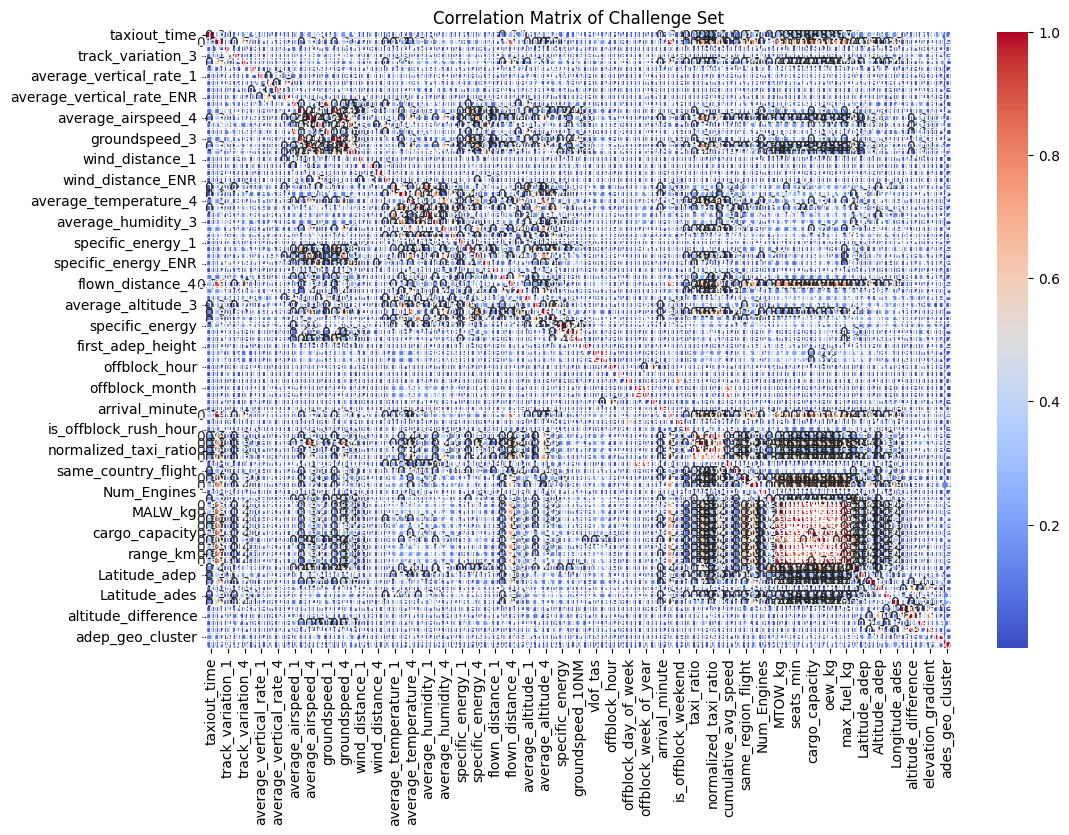

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create correlation matrix
corr_matrix = X.corr(numeric_only=True).abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
print(to_drop)

# corr_matrix['offblock_week_of_year'].sort_values(ascending=False).head()
# corr_matrix['offblock_to_arrival_duration'].sort_values(ascending=False).head()
# corr_matrix['normalized_taxi_ratio'].sort_values(ascending=False).head()
# corr_matrix['MALW_kg'].sort_values(ascending=False).head()

# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Challenge Set')
plt.show()

# # Drop features 
# X.drop(to_drop, axis=1, inplace=True)

In [9]:
print(X.iloc[:, 58])
print('Sum of elements as float: ', X.iloc[:, 58].sum())
print(X.iloc[:, 59])
print('Sum of elements as float: ', X.iloc[:, 59].sum())

0         1
1         1
2         1
3         1
4         1
         ..
369008    1
369009    1
369010    1
369011    1
369012    1
Name: is_offblock_weekend, Length: 369013, dtype: int64
Sum of elements as float:  104504
0         0
1         1
2         1
3         0
4         0
         ..
369008    0
369009    0
369010    0
369011    1
369012    1
Name: is_offblock_rush_hour, Length: 369013, dtype: int64
Sum of elements as float:  132093


In [9]:
# Converting this categorical variable to int because Catboost wasn't liking it as float
X['temperature_bins_ARR'] = X['temperature_bins_ARR'].astype(int)
X['humidity_bins_DEP'] = X['humidity_bins_DEP'].astype(int)

In [10]:
print(X.iloc[:, 58])

0         2
1         3
2         2
3         3
4         2
         ..
369008    3
369009    2
369010    2
369011    1
369012    2
Name: temperature_bins_ARR, Length: 369013, dtype: int32


In [10]:
from catboost import CatBoostRegressor, Pool, metrics
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

not_dropped_cat_names = [x for x in cat_names if x not in to_drop]

params = {
    'learning_rate': 0.05, 
    'reg_lambda': 69.07051080443502, 
    # 'subsample': 0.9831691718361609, 
    'random_strength': 16.348436502754343, 
    'depth': 11, 
    # 'colsample_bylevel': 0.9434202103659302, 
    'min_data_in_leaf': 2, 
    'leaf_estimation_iterations': 7
    # 'reg_lambda': 15.865685490104017, 
    # 'random_strength': 33.58229075926253, 
    # 'depth': 11, 
    # 'min_data_in_leaf': 3, 
    # 'leaf_estimation_iterations': 15
}
train_pool = Pool(X_train, y_train, cat_features=not_dropped_cat_names)
val_pool = Pool(X_val, y_val, cat_features=not_dropped_cat_names)

model = CatBoostRegressor(
    iterations=5000,
    objective=metrics.RMSE(),
    eval_metric=metrics.RMSE(),
    random_seed=42,
    verbose=False,
    task_type='GPU',
    use_best_model=True,
    od_type='Iter',
    od_wait=20,
    **params,
)

In [ ]:
result = model.select_features(
    train_pool, eval_set=val_pool,
    features_for_select=X_train.columns.tolist(),
    num_features_to_select=40,
    steps=5,
    plot=True,
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Step #1 out of 5
bestTest = 2486.622392
bestIteration = 4998
Shrink model to first 4999 iterations.


In [ ]:
print(result['eliminated_features_names'])

In [ ]:
X.drop(['wind_distance_ARR_100', 'average_airspeed_ARR_100', 'track_variation_ARR_100', 
        'is_offblock_weekend', 'Num_Engines', 'flown_distance_ARR_100', 'average_humidity_ARR_100',
        'average_temperature_ARR_100', 'wind_distance_DEP_100', 'arrival_minute', 'track_variation_ENR',
        'groundspeed_ARR_100', 'average_vertical_rate_ARR_100', 'taxiout_time', 'track_variation_DEP_100',
        'average_airspeed_DEP_100', 'offblock_minute', 'average_airspeed_ENR', 'specific_energy_ENR',
        'taxi_ratio', 'average_humidity_DEP_100', 'specific_energy_ARR_100', 'is_offblock_rush_hour',
        'wind_distance_ENR', 'groundspeed_ENR', 'altitude_difference', 'average_vertical_rate_ENR',
        'bearing', 'Altitude_ades'], axis=1, inplace=True)

In [ ]:
print(result['eliminated_features_names'])
X.drop(result['eliminated_features_names'], axis=1, inplace=True)

In [ ]:
eliminated = ['wind_distance_ARR_100', 'average_airspeed_ARR_100', 'track_variation_ARR_100', 
        'is_offblock_weekend', 'Num_Engines', 'flown_distance_ARR_100', 'average_humidity_ARR_100',
        'average_temperature_ARR_100', 'wind_distance_DEP_100', 'arrival_minute', 'track_variation_ENR',
        'groundspeed_ARR_100', 'average_vertical_rate_ARR_100', 'taxiout_time', 'track_variation_DEP_100',
        'average_airspeed_DEP_100', 'offblock_minute', 'average_airspeed_ENR', 'specific_energy_ENR',
        'taxi_ratio', 'average_humidity_DEP_100', 'specific_energy_ARR_100', 'is_offblock_rush_hour',
        'wind_distance_ENR', 'groundspeed_ENR', 'altitude_difference', 'average_vertical_rate_ENR',
        'bearing', 'Altitude_ades']
selected_cat_names = [x for x in cat_names if x not in eliminated]

# print(selected_cat_names)
# print(result['eliminated_features_names'])

In [8]:
from catboost import CatBoostRegressor, Pool, metrics
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

params = {
    'learning_rate': 0.01, 
    'reg_lambda': 69.07051080443502, 
    # 'subsample': 0.9831691718361609, 
    'random_strength': 16.348436502754343, 
    'depth': 11, 
    # 'colsample_bylevel': 0.9434202103659302, 
    'min_data_in_leaf': 2, 
    'leaf_estimation_iterations': 7
    # 'reg_lambda': 15.865685490104017, 
    # 'random_strength': 33.58229075926253, 
    # 'depth': 11, 
    # 'min_data_in_leaf': 3, 
    # 'leaf_estimation_iterations': 15
}
not_dropped_cat_names = [x for x in cat_names if x not in to_drop]

train_pool = Pool(X_train, y_train, cat_features=cat_names)
val_pool = Pool(X_val, y_val, cat_features=cat_names)
# train_pool = Pool(X_train, y_train, cat_features=not_dropped_cat_names)
# val_pool = Pool(X_val, y_val, cat_features=not_dropped_cat_names)
# train_pool = Pool(X_train, y_train, cat_features=selected_cat_names)
# val_pool = Pool(X_val, y_val, cat_features=selected_cat_names)

model = CatBoostRegressor(
    iterations=50000,
    objective=metrics.RMSE(),
    eval_metric=metrics.RMSE(),
    random_seed=42,
    verbose=False,
    task_type='GPU',
    use_best_model=True,
    od_type='Iter',
    od_wait=50,
    **params,
)

In [16]:
model.fit(
    train_pool, eval_set=val_pool,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [9]:
best_iteration = model.get_best_iteration()
model = CatBoostRegressor(
    iterations=44649,#best_iteration
    objective=metrics.RMSE(),
    random_seed=42,
    verbose=False,
    task_type='GPU',
    **params,
)
model.fit(
    X, y, 
    cat_features=cat_names,
    # cat_features=not_dropped_cat_names,
    # cat_features=selected_cat_names, 
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [17]:
feature_importances = model.get_feature_importance(train_pool)
feature_names = X_train.columns
for score, name in sorted(zip(feature_importances, feature_names), reverse=True):
    print('{}: {}'.format(name, score))

FAA_Weight: 10.67212711468118
range_km: 9.751060856646617
max_fuel_kg: 9.317635513389869
airline: 9.049311131304027
oew_kg: 8.818231951735418
cargo_capacity: 6.261168821357637
Manufacturer: 5.456664000127074
wtc: 4.881357807087136
MALW_kg: 4.468609732923717
cruise_kmph: 3.365351110621654
stall_vel_knots: 2.4324410845409457
flown_distance: 1.9111282387369062
flight_duration_category: 1.8022730588096787
seats_min: 1.5759191515809186
aircraft_type: 1.2775976224380767
seats_max: 1.2667011484647916
offblock_to_arrival_duration: 1.1854446150460314
speed_per_distance: 1.1747116715983226
Model_FAA: 1.0770002204124198
average_altitude_4: 1.0589540327027758
Approach_Speed_knot: 0.9931871198554201
average_vertical_rate_3: 0.7420687737945441
MTOW_kg: 0.7278954444889315
flown_distance_4: 0.5604401229191802
Latitude_adep: 0.5392495963922729
ades_region: 0.47179204838605376
average_altitude_ENR: 0.4642553223881895
normalized_taxi_ratio: 0.4482683221955071
adep_geo_cluster: 0.4454065752168515
ades_geo

In [ ]:
trajectory_features = [
    'track_variation_ARR_100',
    'track_variation_DEP_100',
    'track_variation_ENR',
    'average_vertical_rate_ARR_100',
    'average_vertical_rate_DEP_100',
    'average_vertical_rate_ENR',
    'average_airspeed_ARR_100',
    'average_airspeed_DEP_100'
    'average_airspeed_ENR',
    'groundspeed_ARR_100',
    'groundspeed_DEP_100',
    'groundspeed_ENR',
    'wind_distance_ARR_100',
    'wind_distance_DEP_100',
    'wind_distance_ENR',
    'average_temperature_ARR_100',
    'average_temperature_DEP_100',
    'average_temperature_ENR',
    'average_humidity_ARR_100',
    'average_humidity_DEP_100',
    'average_humidity_ENR',
    'specific_energy_ARR_100',
    'specific_energy_DEP_100',
    'specific_energy_ENR',
    'flown_distance_ARR_100',
    'flown_distance_DEP_100',
    'flown_distance_ENR',
    'specific_energy',
]

for score, name in sorted(zip(feature_importances, feature_names), reverse=True):
    if name in trajectory_features:
        print('{}: {}'.format(name, score))

## Training on GPU

In [ ]:
params = {
    'objective': 'RMSE',
    'iterations': 500,
    'learning_rate': 0.1,
    'eval_metric': metrics.RMSE(),
    'random_seed': 42,
    'logging_level': 'Silent',
    'use_best_model': False,
    'task_type': 'GPU',
}
train_pool = Pool(X_train, y_train, cat_features=cat_names)
val_pool = Pool(X_val, y_val, cat_features=cat_names)

In [ ]:
%%time
from sklearn.metrics import mean_squared_error

model = CatBoostRegressor(**params)
model.fit(train_pool, eval_set=val_pool)

best_model_params = params.copy()
best_model_params.update({
    'use_best_model': True
})
best_model = CatBoostRegressor(**best_model_params)
best_model.fit(train_pool, eval_set=val_pool)

print('Simple model validation MSE: {:.4}'.format(
    root_mean_squared_error(y_val, model.predict(X_val))
))
print('')

print('Best model validation MSE: {:.4}'.format(
    root_mean_squared_error(y_val, best_model.predict(X_val))
))

## Features Importances

In [ ]:
model = CatBoostRegressor(**params).fit(train_pool)
feature_importances = model.get_feature_importance(train_pool)
feature_names = X_train.columns
for score, name in sorted(zip(feature_importances, feature_names), reverse=True):
    print('{}: {}'.format(name, score))

## Hyperparameter Tunning

In [ ]:
!pip install optuna

In [ ]:
import optuna

def objective(trial):
    # Taken from: https://deepnote.com/app/svpino/Tuning-Hyperparameters-with-Optuna-ea1a123d-8d2f-4e20-8f22-95f07470d557
    params = {
        'learning_rate' : trial.suggest_float('learning_rate', 0.01, 1),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-5, 100),
        # 'subsample': trial.suggest_float('subsample', 0, 1),
        'random_strength': trial.suggest_float('random_strength', 10, 50),
        'depth': trial.suggest_int('depth', 1, 15),
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 1, 30),
        'leaf_estimation_iterations': trial.suggest_int('leaf_estimation_iterations', 1, 15),
    }
    
    model = CatBoostRegressor(
        iterations=1000,
        eval_metric=metrics.RMSE(),
        random_seed=42,
        verbose=False,
        objective=metrics.RMSE(),
        task_type='GPU', # training on GPU
        use_best_model=True,
        od_type='Iter',
        od_wait=20,
        **params,
    )

    cv_data = cv(
        train_pool,
        model.get_params(),
        logging_level='Silent',
    )
    best_rmse = np.min(cv_data['test-RMSE-mean'])

    return best_rmse

In [ ]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

# Display the best hyperparameters found
print(f"Best trial: {study.best_trial.params}")

# Train the final model with the best parameters
best_params = study.best_trial.params
best_model = CatBoostRegressor(
    iterations=5000,
    eval_metric=metrics.RMSE(),
    random_seed=42,
    logging_level='Silent',
    objective=metrics.RMSE(),
    task_type='GPU', # training on GPU
    use_best_model=True,
    od_type='Iter',
    od_wait=20,
    **best_params,
)

# Train the model with early stopping
best_model.fit(train_pool, eval_set=val_pool)

In [ ]:
model = CatBoostRegressor(
    l2_leaf_reg=int(best['l2_leaf_reg']),
    learning_rate=best['learning_rate'],
    iterations=3000,
    eval_metric=metrics.RMSE(),
    random_seed=42,
    verbose=False,
    objective=metrics.RMSE(),
    task_type='GPU',
    use_best_model=True,
)
cv_data = cv(Pool(X, y, cat_features=cat_names), model.get_params(), plot=True)

In [ ]:
print('RMSE score: {}'.format(np.min(cv_data['test-RMSE-mean'])))

In [ ]:
model.fit(train_pool, eval_set=val_pool)

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 2))
preds_val = model.predict(X_val)
diff_val = preds_val - y_val
plt.hist(diff_val, bins=200)
diff_val.mean(), diff_val.std()

In [ ]:
print('Model validation RMSE: {:.4}'.format(
    root_mean_squared_error(y_val * std + mean, preds_val * std + mean)
))

## Submissão

In [14]:
df_test = pd.read_csv("./data/submission_set_updated_v13.csv")
df_test.head()

,adep,ades,aircraft_type,wtc,airline,taxiout_time,flown_distance,track_variation_1,track_variation_3,track_variation_4,...,Altitude_adep,Latitude_ades,Longitude_ades,Altitude_ades,altitude_difference,bearing,elevation_gradient,adep_geo_cluster,ades_geo_cluster,tow
0,LTFJ,LFLL,B738,M,6351ec1b849adacc0cbb3b1313d8d39b,15.0,1122,95.626012,61.832877,50.730654,...,312,45.726,5.091,251,-61,293.477205,-0.030154,11,17,NaN
1,EBBR,KJFK,A333,H,bdeeef3a675587d530de70a25d7118d2,15.0,3205,101.189988,65.739142,93.558319,...,57,40.640,-73.779,4,-53,291.395141,-0.009004,6,1,NaN
2,KMIA,EGLL,B77W,H,5543e4dc327359ffaf5b9c0e6faaf0e1,10.0,3965,1.711789,74.068356,5.759176,...,3,51.477,-0.461,25,22,43.036806,0.003095,12,13,NaN
3,EGCN,LEAL,B38M,M,3922524069809ac4326134429751e26f,10.0,986,102.310967,173.554269,48.394015,...,55,38.282,-0.558,44,-11,178.644825,-0.006508,13,19,NaN
4,EIDW,LFLL,A320,M,a73f82288988b79be490c6322f4c32ed,15.0,686,2.980642,132.161710,50.958616,...,74,45.726,5.091,251,177,131.790949,0.149765,0,17,NaN


In [15]:
X_test = df_test.drop('tow', axis=1)

In [16]:
# X_test.drop(to_drop, axis=1, inplace=True)
# X_test.drop(eliminated, axis=1, inplace=True)
# X_test.drop(['offblock_to_arrival_duration', 'normalized_taxi_ratio', 'MALW_kg'], axis=1, inplace=True)

In [17]:
y_pred = model.predict(X_test)
y_test = y_pred

In [18]:
y_test

array([ 69072.11604791, 213505.34408824, 216155.38405692, ...,
        73588.90598037,  60486.73673629,  63247.33644739])

In [19]:
dft0 = pd.read_csv('./data/submission_set.csv')
dft0['tow'] = y_test
dft0[['flight_id', 'tow']].to_csv('catboost.csv', index=False)

In [20]:
!head catboost.csv

'head' nÆo ‚ reconhecido como um comando interno
ou externo, um programa oper vel ou um arquivo em lotes.


In [21]:
submission_dataset = df_test
submission_dataset['tow'] = y_pred
# submission_dataset.head()
pd.set_option('display.max_rows', None)
# print(submission_dataset.T)
pd.reset_option('display.max_rows')
print((submission_dataset['tow'] > submission_dataset['MTOW_kg']).sum())
mask = (submission_dataset['tow'] > submission_dataset['MTOW_kg'])
submission_dataset.loc[mask, 'tow'] = submission_dataset.loc[mask, 'MTOW_kg']
print((submission_dataset['tow'] > submission_dataset['MTOW_kg']).sum())

54
0


In [22]:
dft0 = pd.read_csv('./data/submission_set.csv')
dft0['tow'] = submission_dataset['tow']
dft0[['flight_id', 'tow']].to_csv('catboost_sat.csv', index=False)

In [ ]:
!mc cp ./catboost_sat.csv dc24/submissions/team_tiny_rainbow_v45_7ec66710-1eb8-478e-8976-584c090b6373.csv